# Data Gathering / Cleaning

In [28]:
import pandas as pd
import numpy as np
# adding a note

In [43]:
# Set the file paths for the two tables
table1_file = "enrollmentreport.xlsm"
table2_file = "PIF_CANCELLATION_DATASET.xlsx"

# Read the two tables into pandas dataframes
table1 = pd.read_excel(table1_file, sheet_name="Pricing Scenario set up", dtype = str)
table2 = pd.read_excel(table2_file, sheet_name="Pricing Scenario 1", dtype = str)

In [56]:
# Inner join the two tables on the "Account_ID" column
result = pd.merge(table1, table2, on="Account_ID", how="inner")

# Create a list of states to filter, then remove rows where "State_x" is in the list of states
states = ["NY", "NJ", "CT"]
result = result[~result["State_x"].isin(states)]


#  drop columns that I dont need and rename them all
result = result.rename(columns = {
                        "Company_x" : "Company",
                        "Coverage Type_x": "Coverage Type", 
                        "State_x" : "State", 
                        "Zip Code_x" : "Zip Code", 
                        "3 digit Zip_x" : "3 digit Zip",
                        "Species_x" : "Species", 
                        "Age (years)_x" : "Age",
                        "Breed_x" : "Breed",
                        "Billing_x" : "Billing",
                        "Gender_x" : "Gender",
                        "Deductible_y" : "Deductible",
                        "Reimbursement (1 - Copay)" : "Reimbursement",
                        "Annual Limit_x" : "Annual Limit",
                        "Multipolicies_x" : "Multipolicies",
                        "Multipet2_x" : "Multipet2",
                        "Multipet3_x" : "Multipet3",
                        "Military_x" : "Military",
                        "LM Price_x" : "LM Price",
                        "SAFECO Price_y" : "Safeco Price",
                        "Priority Code_x" : "Priority Code"
                        })
print(result.columns)

https://github.com/henrym105/personal_projects/blob/91e9bf6169402475fb38a514d1154f95c2537d05/LM_to_Safeco_Pet_Conversion/main.ipynb#L4

result = result[["Account_ID",
                "Company",
                "Coverage Type", 
                "State", 
                "Zip Code", 
                "3 digit Zip",
                "Species", 
                "Age",
                "Breed",
                "Billing",
                "Gender",
                "Deductible",
                "Reimbursement",
                "Annual Limit",
                "Multipolicies",
                "Multipet2",
                "Multipet3",
                "Military",
                "LM Price",
                "Safeco Price",
                "Priority Code"
            ]]
print(result.shape)
result = result.drop_duplicates(subset = ["Account_ID"])
result.shape

Index(['Account_ID', 'Company', 'Coverage Type', 'State', 'Zip Code',
       '3 digit Zip', 'Species', 'Age', 'Breed', 'Billing', 'Gender',
       'Deductible_x', 'Reimbursement ', 'Annual Limit', 'Multipolicies',
       'Multipet2', 'Multipet3', 'Military', 'LM Price', 'SAFECO Price_x',
       'Priority Code', 'Company_y', 'Coverage Type_y', 'State_y',
       'Zip Code_y', '3 digit Zip_y', 'Species_y', 'Age (years)_y', 'Breed_y',
       'Billing_y', 'Gender_y', 'Deductible', 'Reimbursement',
       'Annual Limit_y', 'Multipolicies_y', 'Multipet2_y', 'Multipet3_y',
       'Military_y', 'LM Price_y', 'Safeco Price'],
      dtype='object')
(12512, 21)


(8890, 21)

In [46]:
# Save the modified dataframe to a new CSV file
result.to_csv("merge_result.csv", index=False)

# Copy and paste the "merge_result.csv" file into the Safeco Pet Rater excel file
# Run the macro to get SF Pet rater quote (~26 mins)
# Paste the results into the "LM_Pet_Results.xslx" sheet

#     Results & Visualizations

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the file path for the Excel file
filepath = "LM_Pet_results.xlsx"

# Read the "Results" sheet from the Excel file into a pandas dataframe
df = pd.read_excel(filepath, sheet_name="Results")

# Adding a column to mark if each row has a Priority code or not
df['Priority Code Ind'] = np.where(df['Priority Code'].isnull(), 'N', 'Y')
df = df.dropna(subset = ['LM Price', 'Safeco Price'])
# df.head()

# sf_prices_to_drop = ['1.70', '25.87', '17.36', '21.87']
sf_prices_to_drop = [1.70, 25.87, 17.36, 21.87]

print(df.shape)
df = df.loc[~df["Safeco Price"].isin(sf_prices_to_drop)]
print(df.shape)
df.head(10)

# df["Safeco Price"].value_counts()

(7969, 23)
(4139, 23)


,Account_ID,Company,Coverage Type,State,Zip Code,3 digit Zip,Species,Age,Breed,Billing,...,Annual Limit,Multipolicies,Multipet2,Multipet3,Military,LM Price,Safeco Price,Priority Code,SF price is [__]% of LM price,Priority Code Ind
0,608377,LM,Accident & Illness,MA,2143,All,Dog,2,Chihuahua,Monthly,...,15000,False,False,False,False,37.06,22.02,NaN,0.594172,N
1,609780,LM,Accident & Illness,PA,19103,All,Dog,2,Labrador Retriever,Monthly,...,10000,False,False,False,False,19.78,37.94,NaN,1.918099,N
3,609970,LM,Accident & Illness,OH,45373,All,Dog,4,Chihuahua,Monthly,...,5000,False,False,False,False,26.92,24.91,NaN,0.925334,N
6,610805,LM,Accident & Illness,TX,78748,787,Dog,13,Catahoula Leopard Dog,Monthly,...,10000,False,True,False,False,65.79,225.47,NaN,3.427117,N
7,610806,LM,Accident & Illness,TX,78748,787,Dog,4,Great Dane,Monthly,...,10000,False,True,False,False,52.34,113.78,NaN,2.173863,N
9,611440,LM,Accident & Illness,MA,2760,All,Dog,3,Mastiff,Monthly,...,10000,True,False,False,False,61.50,76.44,NaN,1.242927,N
15,611964,LM,Accident & Illness & Wellness,SC,29335,293,Dog,3,Yorkshire Terrier,Monthly,...,10000,False,True,False,False,77.02,51.11,NaN,0.663594,N
16,611965,LM,Accident & Illness & Wellness,SC,29335,293,Dog,8,Cockapoo,Monthly,...,10000,False,True,False,False,90.81,89.40,NaN,0.984473,N
18,612495,LM,Accident & Illness & Wellness,MA,2368,All,Dog,2,Miniature Pinscher,Monthly,...,10000,False,False,False,False,98.25,71.35,NaN,0.726209,N
21,613245,LM,Accident & Illness & Wellness,IL,60654,606,Cat,2,Ragamuffin,Monthly,...,5000,True,False,False,False,66.00,42.74,NaN,0.647576,N


In [87]:
# Calculate the mean, median, std value of the LM Price column
average_lm_price = df["LM Price"].mean()
median_lm_price = df["LM Price"].median()
std_lm_price = df["LM Price"].std()

# Calculate the average value of the Safeco Price column
average_safeco_price = df["Safeco Price"].mean()
median_safeco_price = df["Safeco Price"].median()
std_safeco_price = df["Safeco Price"].std()

# Calculate the average value of the Safeco Price column
average_safeco_price = df["Safeco Price"].mean()
median_safeco_price = df["Safeco Price"].median()
std_safeco_price = df["Safeco Price"].std()

# Print the results
print(f"Average LM Price: ${average_lm_price:.2f}")
print(f"Median LM Price: ${median_lm_price:.2f}")
print(f"Std Dev of LM Price: ${std_lm_price:.2f}")
print()
print(f"Average Safeco Price: ${average_safeco_price:.2f}")
print(f"Median Safeco Price: ${median_safeco_price:.2f}")
print(f"Std Dev of Safeco Price: ${std_safeco_price:.2f}")

# print("-------------------------------------------")

#############################################################################################33

avg_sf_Male = round(np.mean(df[df["Gender"] == "Male"]["Safeco Price"]), 2)
avg_sf_Female = round(np.mean(df[df["Gender"] == "Female"]["Safeco Price"]), 2)
avg_lm_Male = round(np.mean(df[df["Gender"] == "Male"]["LM Price"]), 2)
avg_lm_Female = round(np.mean(df[df["Gender"] == "Female"]["LM Price"]), 2)

med_sf_Male = np.median(df[df["Gender"] == "Male"]["Safeco Price"])
med_sf_Female = np.median(df[df["Gender"] == "Female"]["Safeco Price"])
med_lm_Male = np.median(df[df["Gender"] == "Male"]["LM Price"])
med_lm_Female = np.median(df[df["Gender"] == "Female"]["LM Price"])

# print(f"Average LM Male: ${avg_lm_Male:.2f}")
# print(f"Average Safeco Male: ${avg_sf_Male:.2f}")

# print(f"Average LM Female: ${avg_lm_Female:.2f}")
# print(f"Average Safeco Female: ${avg_sf_Female:.2f}")

# print(f"Median LM Price: ${median_lm_price:.2f}")
# print(f"Std Dev of LM Price: ${std_lm_price:.2f}")

#############################################################################################

# print("-------------------------------------------\n")


Average LM Price: $56.24
Median LM Price: $55.07
Std Dev of LM Price: $28.85

Average Safeco Price: $65.02
Median Safeco Price: $55.26
Std Dev of Safeco Price: $48.97


In [77]:
# Group df by "Coverage Type" and calculate the mean of "Safeco Price" and "LM Price"
df_coverage = df.groupby("Coverage Type").mean()[["Safeco Price", "LM Price"]].round(2).sort_values("Safeco Price", ascending=False)
df_coverage["Premium Difference"] = df_coverage["Safeco Price"] - df_coverage["LM Price"]

# Count the number of values in each "State"
df_count = df.groupby("Coverage Type").size().reset_index(name="Policy Count")

# Merge df_count into df_states
df_coverage = df_coverage.merge(df_count, on="Coverage Type")

# Print Results
# df_states.sort_values("Policy Count", ascending=False).set_index("Coverage Type")
df_coverage


,Coverage Type,Safeco Price,LM Price,Premium Difference,Policy Count
0,Accident & Illness & Wellness,82.57,84.29,-1.72,1313
1,Accident & Illness,56.86,43.20,13.66,2826


In [78]:
# Group df by "Coverage Type" and calculate the mean of "Safeco Price" and "LM Price"
df_age = df.groupby("Age").mean()[["Safeco Price", "LM Price"]].round(2).sort_values("Safeco Price", ascending=False)
df_age["Premium Difference"] = df_age["Safeco Price"] - df_age["LM Price"]

# Count the number of values in each "State"
df_count = df.groupby("Age").size().reset_index(name="Policy Count")

# Merge df_count into df_states
df_age = df_age.merge(df_count, on="Age")

# Print Results
df_age = df_age.sort_values("Policy Count", ascending=False)
df_age


,Age,Safeco Price,LM Price,Premium Difference,Policy Count
16,1,52.83,56.24,-3.41,964
18,2,48.06,54.27,-6.21,781
15,0,54.97,56.78,-1.81,431
19,3,43.28,48.16,-4.88,323
14,5,61.33,51.73,9.60,254
17,4,48.31,50.35,-2.04,249
13,6,63.43,58.12,5.31,223
12,7,74.37,57.78,16.59,202
10,8,85.85,61.49,24.36,157
9,9,94.22,66.34,27.88,151


In [79]:
# Group df by "Age" and calculate the mean of "Safeco Price" and "LM Price"
df_prioritycode = df.groupby("Priority Code Ind").mean()[["Safeco Price", "LM Price"]].round(2).sort_values("Safeco Price", ascending=False)
df_prioritycode["Premium Difference"] = df_prioritycode["Safeco Price"] - df_prioritycode["LM Price"]

# Count the number of values in each "State"
df_count = df.groupby("Priority Code Ind").size().reset_index(name="Policy Count")

# Merge df_count into df_states
df_prioritycode = df_prioritycode.merge(df_count, on="Priority Code Ind")

# Print Results
# df_states.sort_values("Policy Count", ascending=False).set_index("Coverage Type")
df_prioritycode

,Priority Code Ind,Safeco Price,LM Price,Premium Difference,Policy Count
0,Y,66.02,56.25,9.77,1278
1,N,64.57,56.23,8.34,2861


In [80]:
# Group df by "State" and calculate the mean of "Safeco Price" and "LM Price"
df_states = df.groupby("State").mean()[["Safeco Price", "LM Price"]].round(2).sort_values("Safeco Price", ascending=False)
df_states["Premium Difference"] = df_states["Safeco Price"] - df_states["LM Price"]

# Count the number of values in each "State"
df_count = df.groupby("State").size().reset_index(name="Policy Count")

# Merge df_count into df_states
df_states = df_states.merge(df_count, on="State")

# Print Results
# df_states.sort_values("Premium Difference", ascending=True).set_index("State")
df_states.sort_values("Policy Count", ascending=False).set_index("State")


,Safeco Price,LM Price,Premium Difference,Policy Count
State,,,,
CA,50.26,58.01,-7.75,778
FL,67.44,49.20,18.24,505
MA,69.61,63.49,6.12,433
TX,69.86,53.05,16.81,345
PA,72.06,56.73,15.33,276
NH,70.04,52.73,17.31,166
VA,80.88,63.98,16.90,121
MD,90.55,62.43,28.12,120
GA,70.83,60.37,10.46,113


### Scatter Plot w/ trendlines

Quadratic r^2 = 0.26
Linear Regression r^2 = 0.19


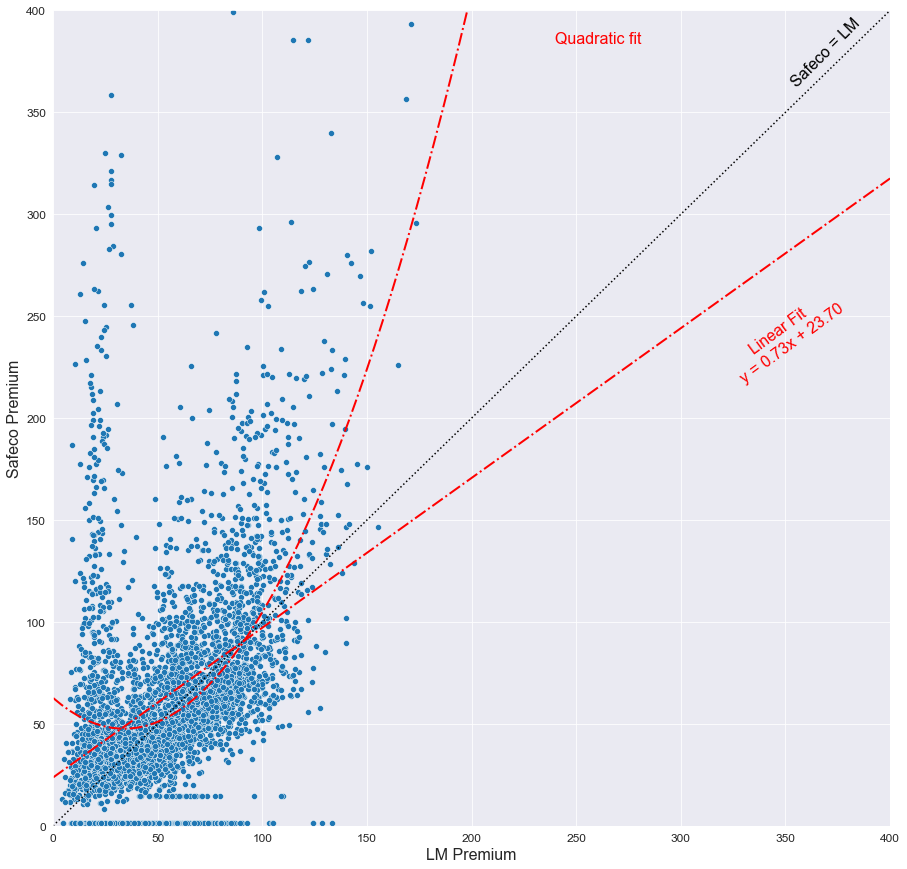

In [81]:
from scipy.stats import linregress
import math
from sklearn.metrics import r2_score

# Set the size of the figure
figure, ax = plt.subplots(figsize=(15, 15))
a=30
xdata=df["LM Price"]
ydata=df["Safeco Price"]

xrange = [0,400]

# Set the x-axis and y-axis limits and add a reference line with slope = 1
limit = 400
ax.set_xlim(0, limit)
ax.set_ylim(0, limit)

# Create the scatterplot
sns.scatterplot(x="LM Price", y="Safeco Price", data=df, ax = ax)
ax.set_xlabel("LM Premium", fontsize=16)
ax.set_ylabel("Safeco Premium", fontsize=16)
ax.tick_params(labelsize=12)


# sns.scatterplot(x=xdata, y=ydata, ax = ax)

#  Add a reference line for y=x. On this line, the policy has the same price in the LM and SF raters 
ax.plot([0,limit], [0,limit], ':', color='black')
ax.text(limit-13, limit-2, 'Safeco = LM', ha='right' , va='top', rotation=45, color='black', fontsize=16)

# Calculate the slope and intercept of the Linear Regression trendline
slope, intercept, r_value, p_value, std_err = linregress(xdata, ydata)
angle = math.degrees(math.atan(slope))

# Add the Linear Regression trendline and label to the plot
ax.plot(xrange, [slope*xi + intercept for xi in xrange], linestyle = '-.', color='red', linewidth = 2)
ax.text(limit-50, 265, f'Linear Fit \n y = {slope:.2f}x + {intercept:.2f}', ha='center', va='top', rotation=angle, color='red', fontsize=16)

# Create a Quadratic Polynomial trendline
coefficients = np.polyfit(xdata, ydata, 2)
quadratic_model = np.poly1d(coefficients)
myline = np.linspace(0, limit, 100)
ax.plot(myline, quadratic_model(myline), color = 'red', linestyle = '-.', linewidth = 2)
ax.text(240, limit-10, 'Quadratic fit', ha='left', va='top', color='red', fontsize=16)

r2quad = r2_score(ydata, quadratic_model(xdata))
r2lin = r2_score(ydata, (slope*xdata + intercept))

print(f'Quadratic r^2 = {r2quad:.2f}')
print(f'Linear Regression r^2 = {r2lin:.2f}')
# print(mymodel)

# Save plot as a pdf
plt.savefig("scatterplot_LM_SF_Price.pdf")

### Create the 4 scatterplots

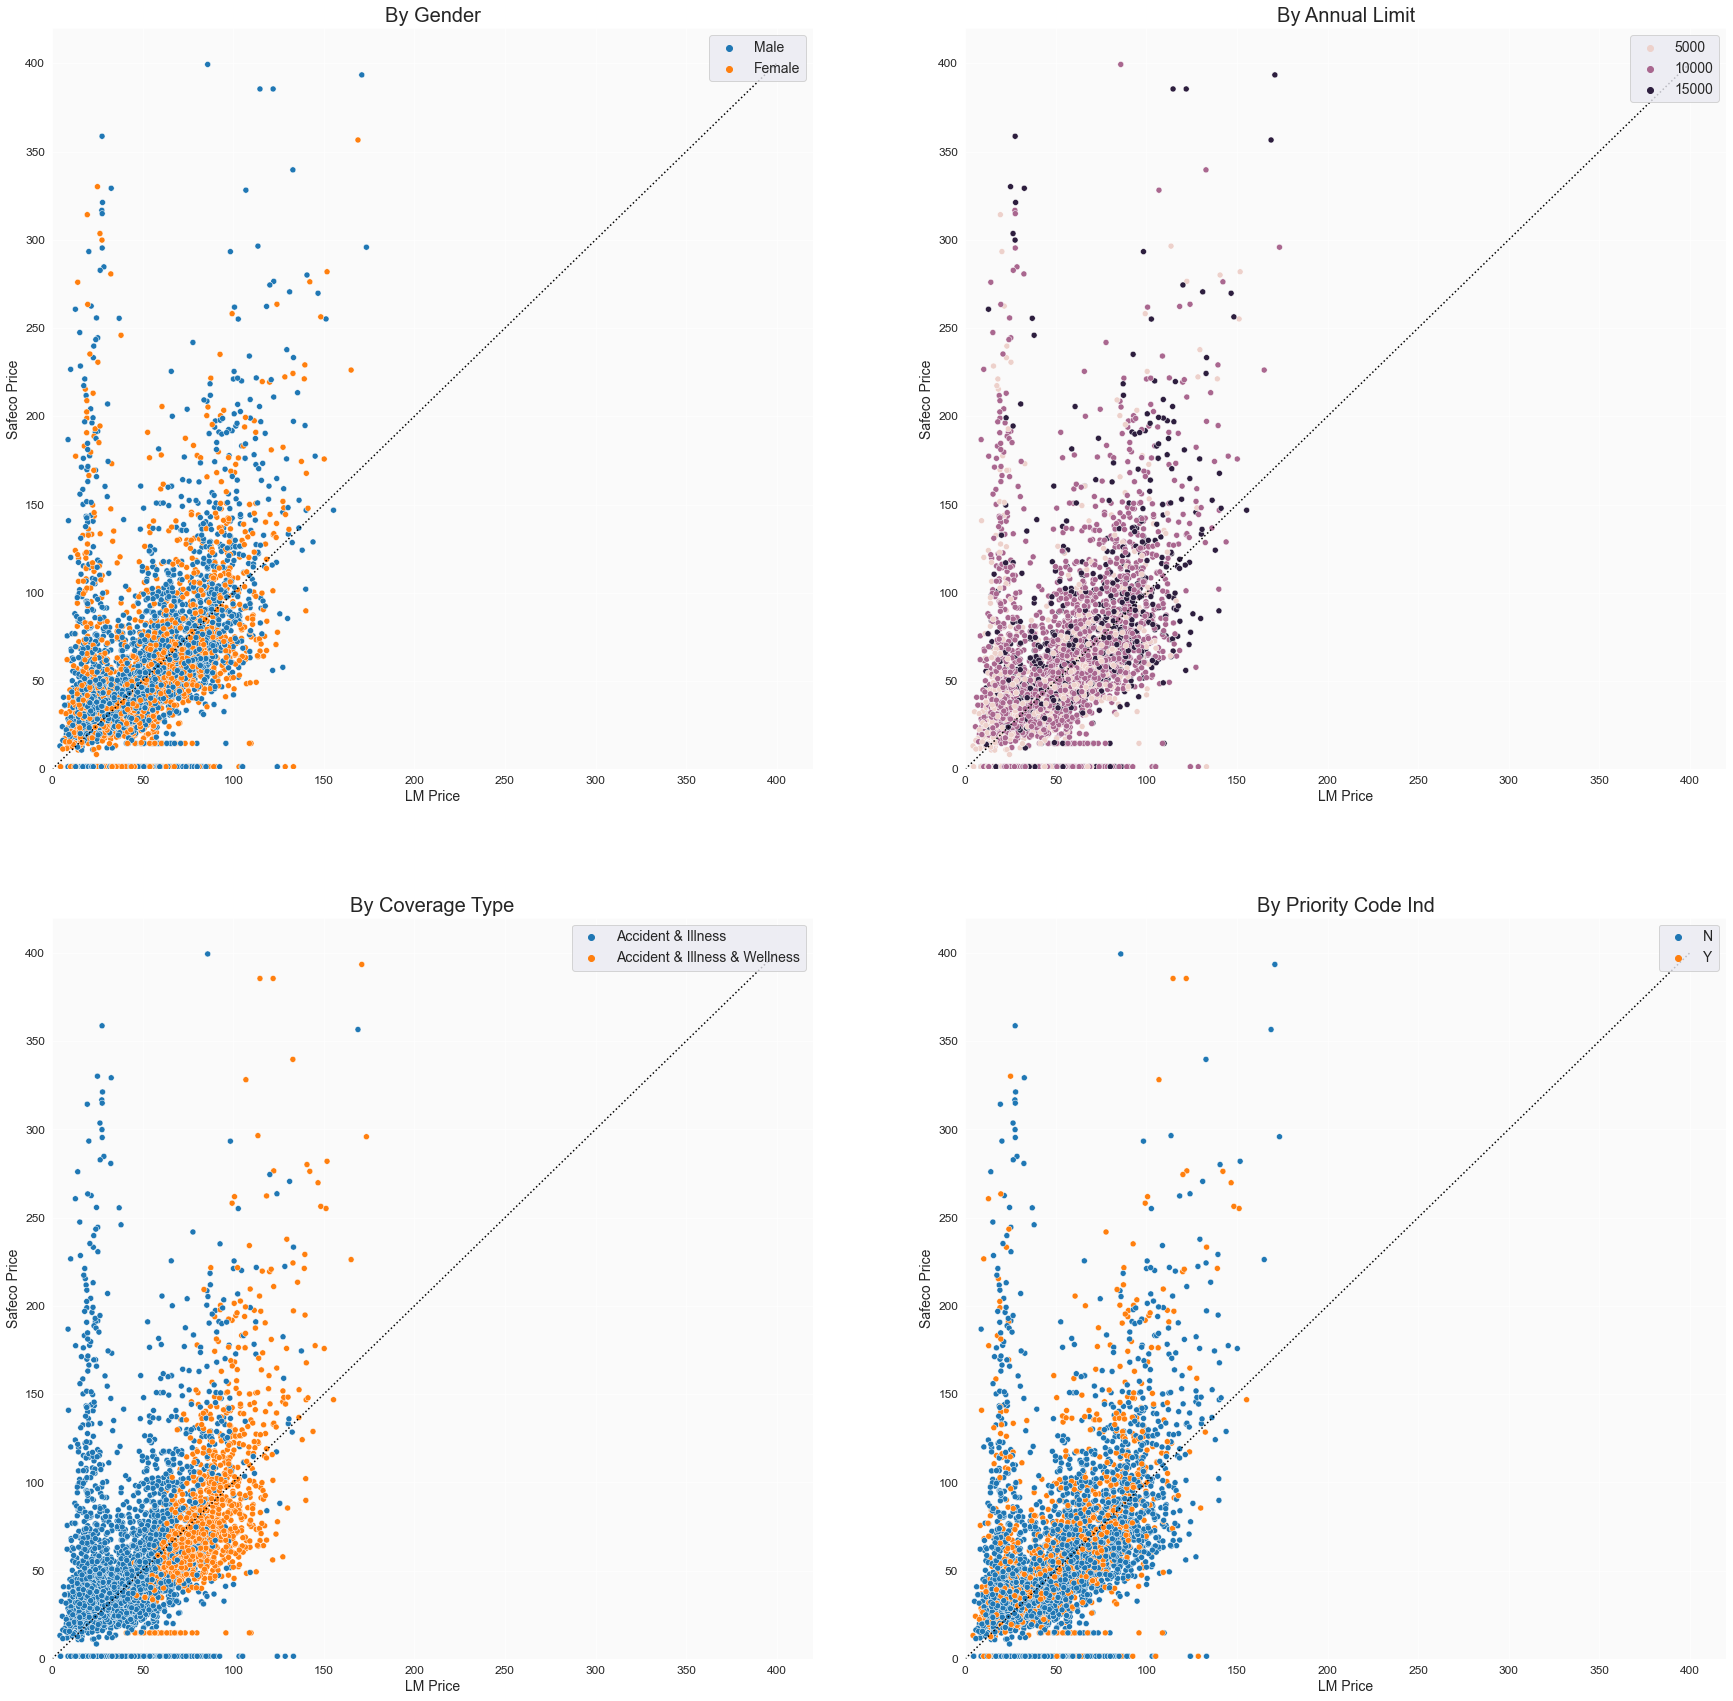

In [82]:
# Set the style for the plot
sns.set_style("darkgrid")

# Create a figure and set the size
figure, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(30, 30))


# Set the x-axis and y-axis limits for each subplot, and add a reference line w/ slope = 1
x = [0, 400]
y = x
for row in ax:
    for col in row:
        col.set_xlim(0, 420)
        col.set_ylim(0, 420)
        col.plot(x, y, ':', color='black')
        

# Create a list of hue values
hues = ['Gender', 'Annual Limit', 'Coverage Type', 'Priority Code Ind']

# Create 4 scatterplots comparing the "LM Price" and "Safeco Price" columns with different color coding
r, c, i = ([0,1], [0,1], 0)
for row in r:
    for col in c:
        sns.scatterplot(x="LM Price", y="Safeco Price", data=df, hue = hues[i], ax = ax[row][col])
        # sns.lmplot(x="LM Price", y="Safeco Price", data=df, hue = hues[i], ax = ax[row][col])
        i+=1

# Edit the characteristics of the scatterplots
i=0
for row in r:
    for col in c:
        ax[row][col].legend(title=False, loc='upper right', fontsize=14, frameon=True)
        ax[row][col].tick_params(labelsize=12)
        ax[row][col].set_ylabel("Safeco Price", fontsize=14)
        ax[row][col].set_xlabel("LM Price", fontsize=14)
        ax[row][col].set_facecolor((0.98, 0.98, 0.98))
        ax[row][col].set_title("By " + hues[i], fontsize=20)
        i+=1


plt.savefig("4plots.pdf")

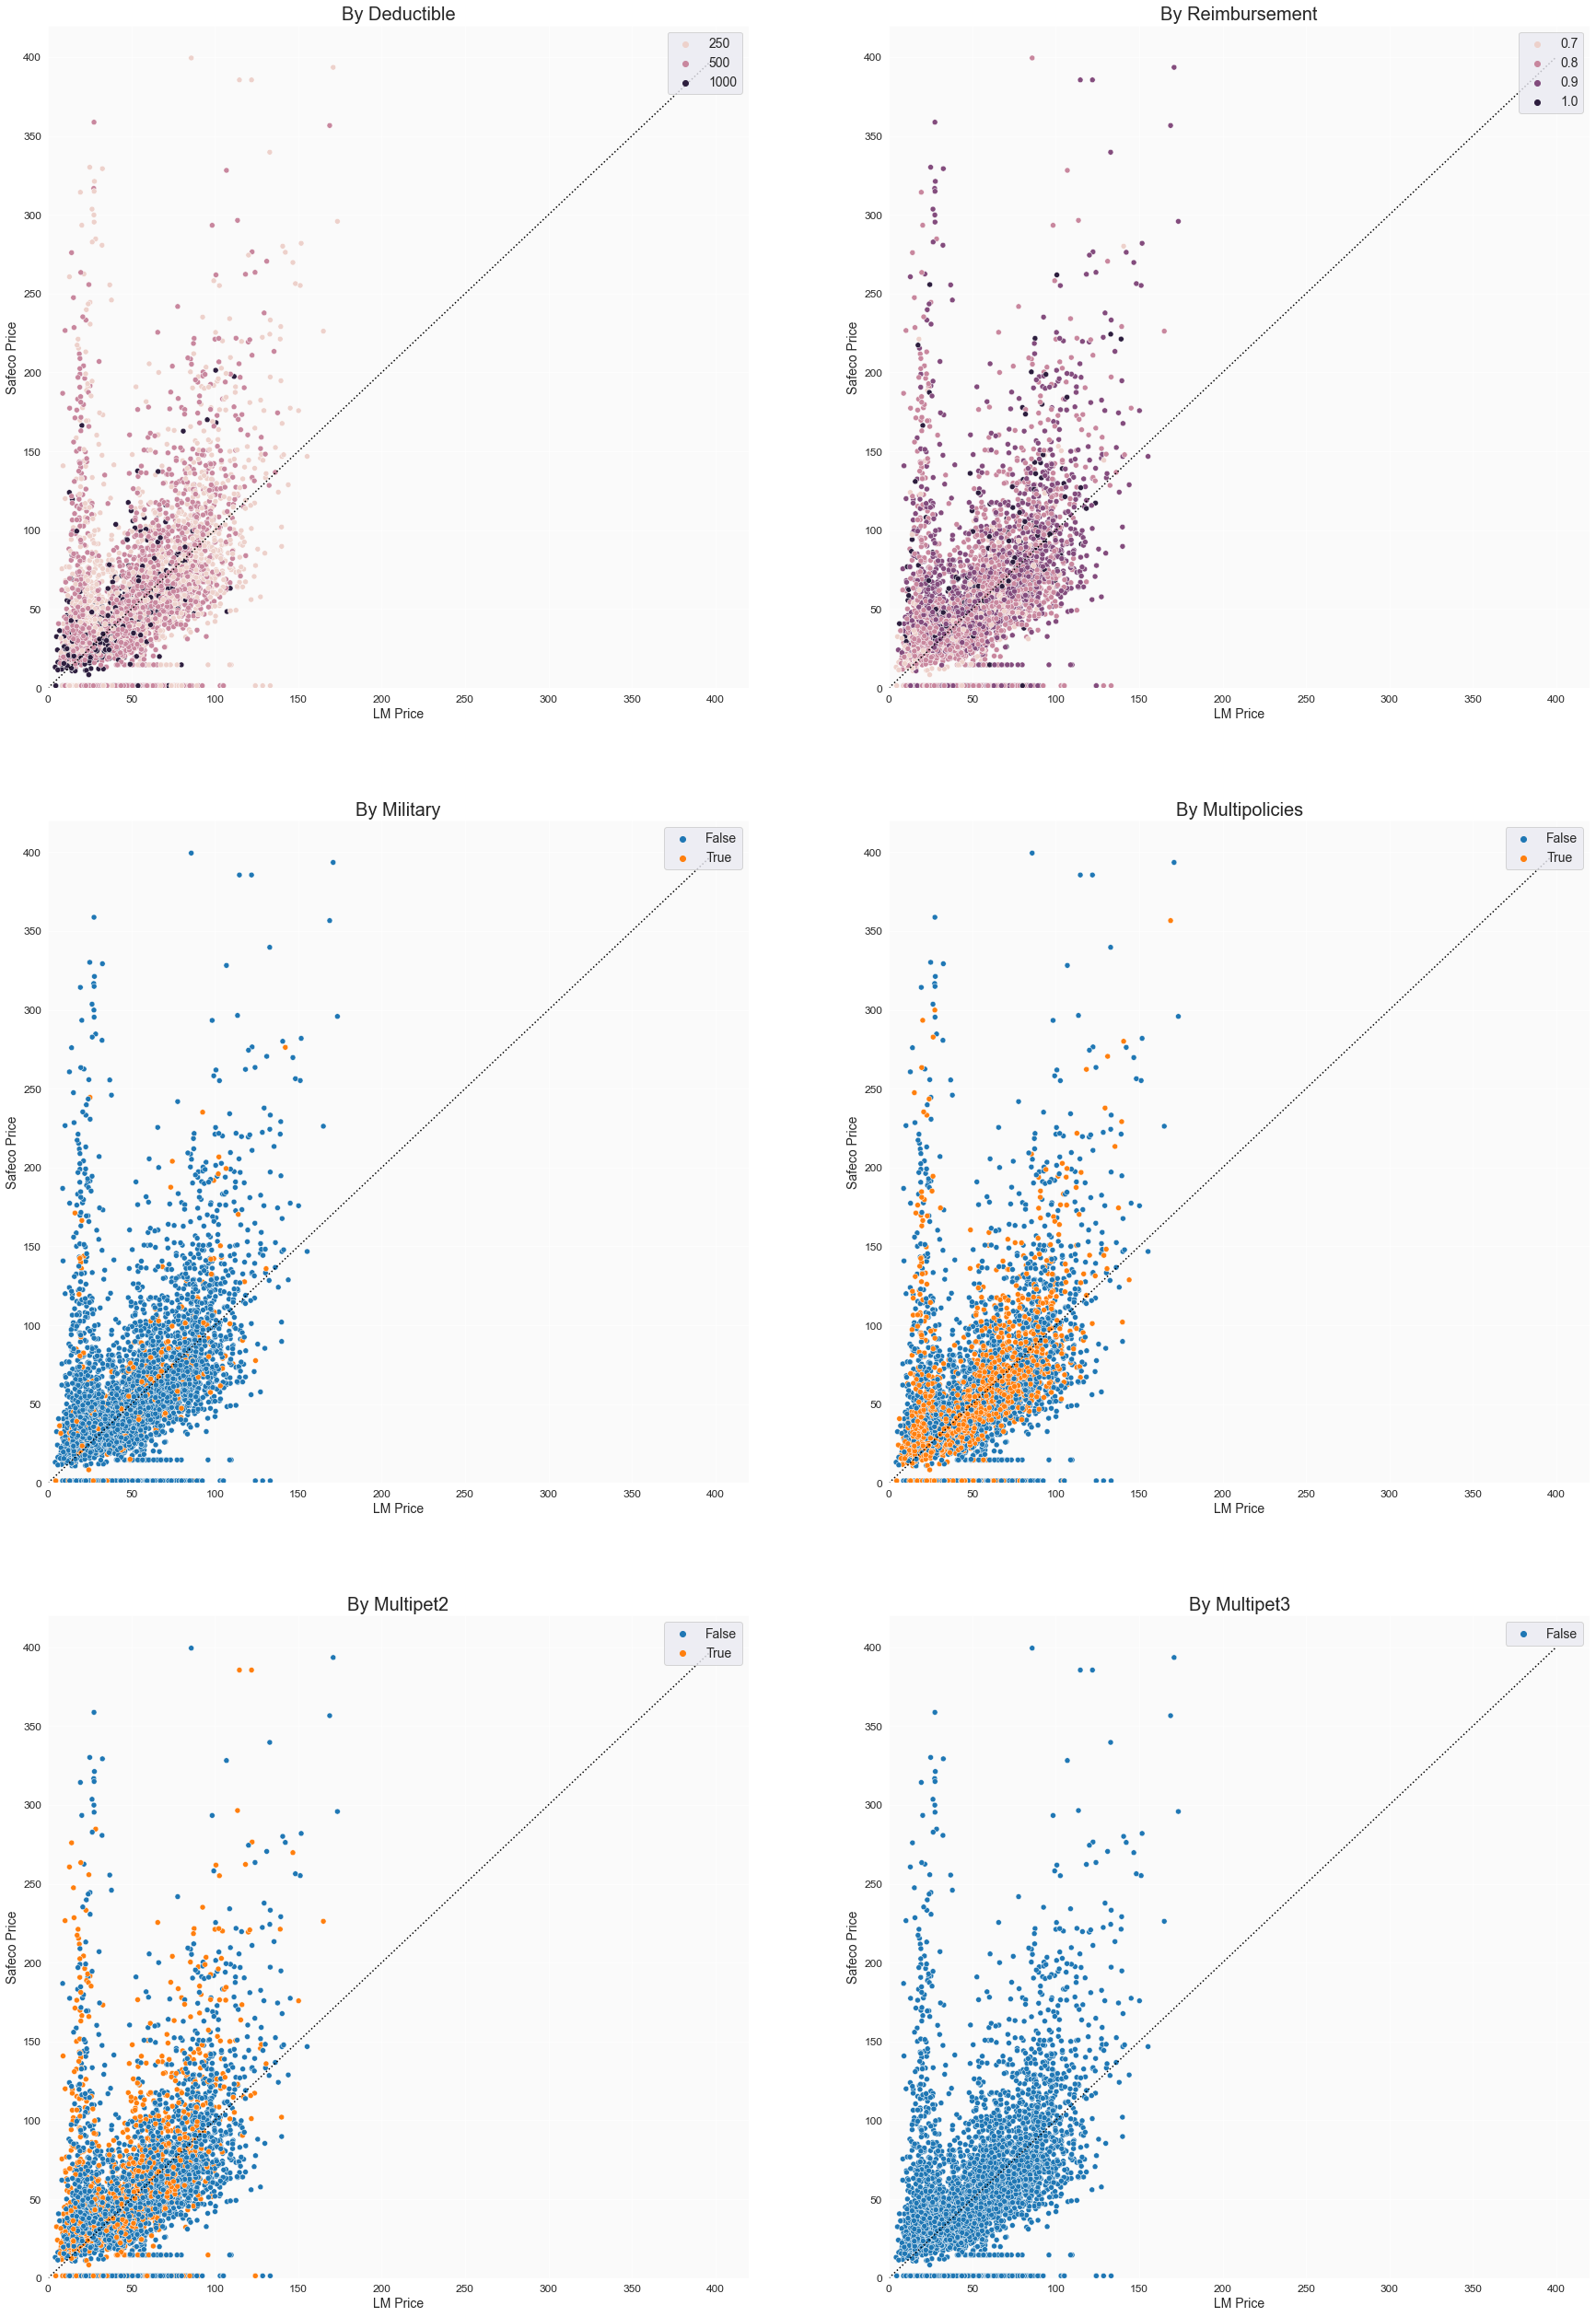

In [83]:
# Set the style for the plot
sns.set_style("darkgrid")

# Create a figure and set the size
rowdim = 3
coldim = 2
figure, ax = plt.subplots(nrows = rowdim, ncols = coldim, figsize=(15*coldim, 15*rowdim))

# Set the x-axis and y-axis limits for each subplot, and add a reference line w/ slope = 1
x = [0, 400]
y = x
for row in ax:
    for col in row:
        col.set_xlim(0, 420)
        col.set_ylim(0, 420)
        col.plot(x, y, ':', color='black')
        

# Create a list of hue values
hues = ['Deductible', 'Reimbursement', 'Military', 'Multipolicies', 'Multipet2', 'Multipet3']
# LM_colors = sns.color_palette(["#FFD000", "#1A1446", "#78E1E1", "#06748C"])
# hue_norm = (0,1,2,3)

# Create 4 scatterplots comparing the "LM Price" and "Safeco Price" columns with different color coding
r, c, i = ([0,1,2], [0,1], 0)
for row in r:
    for col in c:
        sns.scatterplot(x="LM Price", y="Safeco Price", data=df, hue = hues[i], ax = ax[row][col])
        # sns.lmplot(x="LM Price", y="Safeco Price", data=df, hue = hues[i], ax = ax[row][col])
        i+=1

# Edit the characteristics of the scatterplots
i=0
for row in r:
    for col in c:
        ax[row][col].legend(title=False, loc='upper right', fontsize=14, frameon=True)
        ax[row][col].tick_params(labelsize=12)
        ax[row][col].set_ylabel("Safeco Price", fontsize=14)
        ax[row][col].set_xlabel("LM Price", fontsize=14)
        ax[row][col].set_facecolor((0.98, 0.98, 0.98))
        ax[row][col].set_title("By " + hues[i], fontsize=20)
        i+=1


plt.savefig("Deductible,Reimbursement,Military,Multipolicies.pdf")

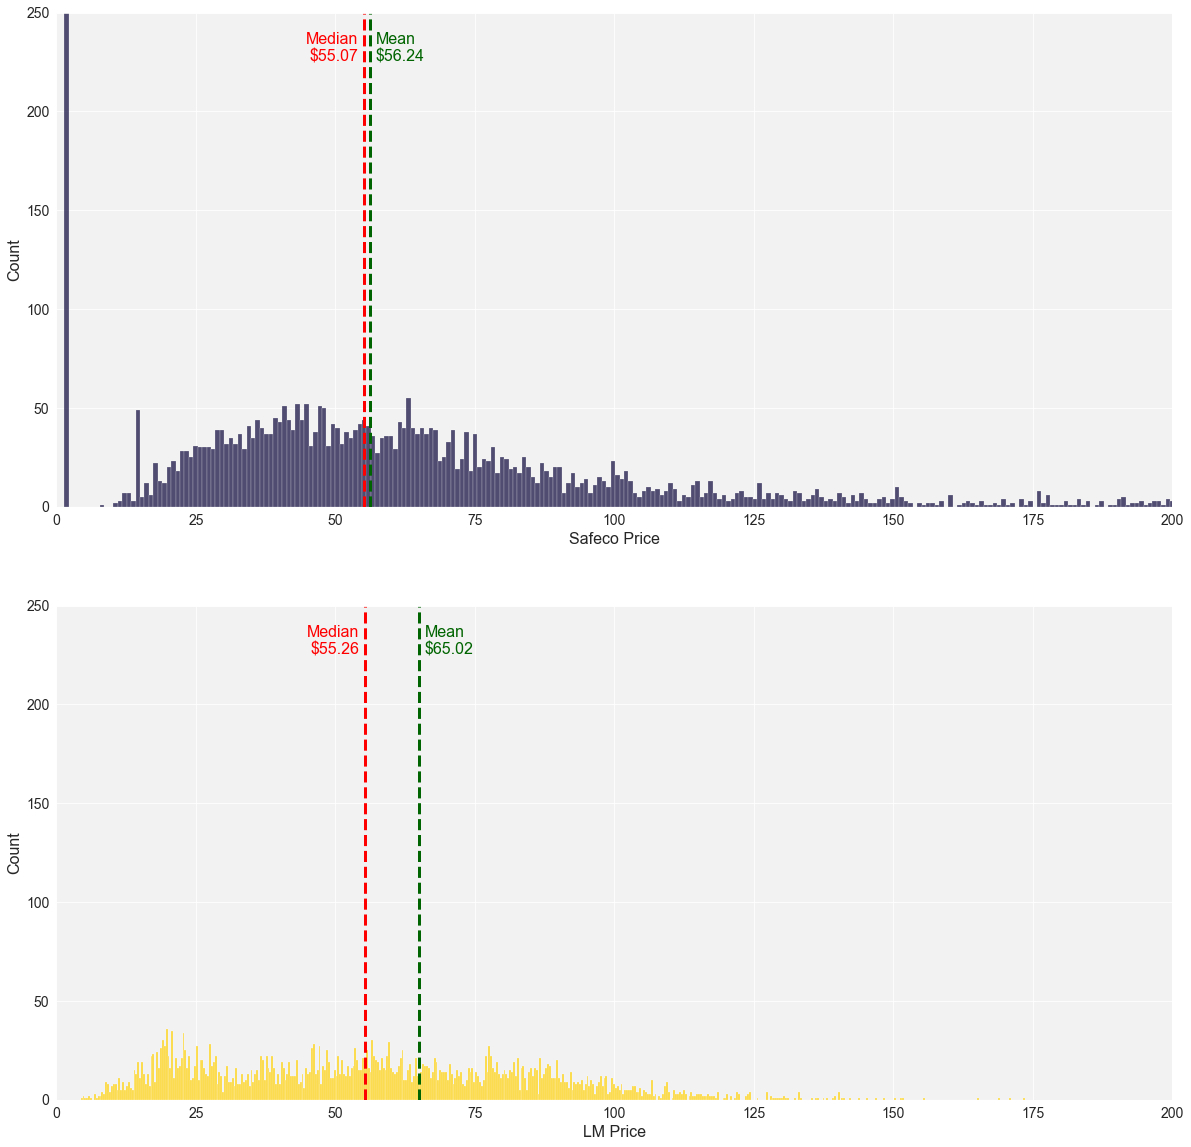

In [84]:
# Plotting histograms to visualize SF and LM price distribution

# Create a figure and set the size
figure, ax = plt.subplots(nrows = 2, ncols=1, figsize=(20, 20))

# Set the x-axis and y-axis limits for each subplot, and add a reference line w/ slope = 1
color = 0.95
barcolors = ['#1A1446', '#FFD000']
xlabs = ["Safeco Price", "LM Price"]

# Create 2 histograms comparing the "LM Price" and "Safeco Price" distributions
r, i = ([0,1], 0)
for row in r:
    sns.histplot(data=df, x = xlabs[i], bins = 500, color=barcolors[i], ax = ax[row])
    i+=1

# Adding vertical lines to show MEDIAN premium
medians = [median_lm_price, median_safeco_price]
for row, x in zip(r, medians):
    # Add the vertical line
    ax[row].axvline(x=x, color='red', linestyle = "dashed",linewidth = 3)
    # Add a label for the vertical line
    ax[row].text(x-1, 240, f'Median\n${x:.2f}', ha='right', va='top', rotation=0, color='red', fontsize=16)

# Adding AVERAGE price vertical lines 
avgs = [average_lm_price, average_safeco_price]
for row, x in zip(r, avgs):
    # Add the vertical line
    ax[row].axvline(x=x, color='darkgreen', linestyle = "dashed",linewidth = 3)
    # Add a label for the vertical line
    ax[row].text(x+1, 240, f'Mean\n${x:.2f}', ha='left', va='top', rotation=0, color='darkgreen', fontsize=16)

# Adding vertical lines to show STD DEV price for SF and LM policies, plotting them onto respective histograms
# stds = [std_lm_price, std_safeco_price]
# for row, x in zip(r, stds):
#     # Add the +1, +2 std dev lines 
#     ax[row].axvline(x=avgs[row]+x, color='lightgray', linestyle = "dashed",linewidth = 3)
#     ax[row].axvline(x=avgs[row]-x, color='lightgray', linestyle = "dashed",linewidth = 3)
#     ax[row].axvline(x=avgs[row]+(2*x), color='lightgray', linestyle = "dashed",linewidth = 3)
#     ax[row].axvline(x=avgs[row]-(2*x), color='lightgray', linestyle = "dashed",linewidth = 3)

    # Add a label for the vertical line
    # ax[row].text(x+1, 220, f'Std Dev\n${x:.2f}', ha='left', va='top', rotation=0, color='gray', fontsize=16)

# Setting visual settings for charts
i=0
for row in ax:
    row.set_xlim(0, 200)
    row.set_ylim(0, 250)
    row.set_facecolor((color, color, color))
    row.tick_params(labelsize=14)
    row.set_ylabel("Count", fontsize=16)
    row.set_xlabel(xlabs[i], fontsize=16)
    i+=1



   # row.set_facecolor("#FFD000")


### Gathering summary statistics for LM & SF Prices

In [85]:
# Getting Summary Statistics for overall LM and Safeco prices

# Initialize the blank DataFrame
PriceSummary = pd.DataFrame()

# Add columns with summary stats
PriceSummary["LM"] = df["LM Price"].describe().round(2)
PriceSummary["Safeco"] = df["Safeco Price"].describe().round(2)

# Calculate median prices and add it to the ResultsSummary df
median_LM = df["LM Price"].median()
median_SF = df["Safeco Price"].median()
PriceSummary.loc["median"] = [median_LM, median_SF]

# Rearrange the df rows so that mean & median are together
PriceSummary = PriceSummary.reindex(['mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max'])

# Print Result
PriceSummary

,LM,Safeco
mean,56.24,65.02
median,55.07,55.26
std,28.85,48.97
min,4.34,1.44
25%,31.10,35.46
50%,55.07,55.26
75%,77.90,80.68
max,173.50,399.36
